In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def jpg_image_to_array(image_path, size) :
    image = Image.open(image_path) # open image
    image = image.resize((size, size)) # resize
    im_arr = np.fromstring(image.tobytes(), dtype = np.uint8) # convert to int ndarray
    print(im_arr.shape)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3)) # reshape to (28, 28, 3)
    print(im_arr.shape)
    im_arr = im_arr*(-1)+255 # convert white background to black background
    return im_arr

def image_array_to_1channel(arr) :
    arr_avg = (arr[:, :, 0] + arr[:, :, 1] + arr[:, :, 2])/3 # convert to 1-channel by averaging
    return arr_avg

(2352,)
(28, 28, 3)


C:\Users\kbum0\AppData\Local\Temp/ipykernel_9560/2092891776.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr = np.fromstring(image.tobytes(), dtype = np.uint8) # convert to int ndarray


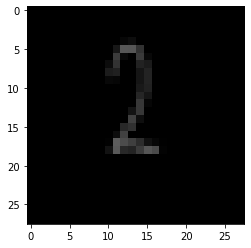

In [3]:
path = "C:/Users/kbum0/workspace/AI_basic/Practice/2.jpg"
arr = jpg_image_to_array(path, 28)
plt.imshow(arr, cmap = plt.get_cmap('gray'))

In [4]:
from tensorflow.python.keras.models import load_model

model = load_model("cnn_mnist.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        12832     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
img_rows, img_cols = 28, 28
arr_1c = image_array_to_1channel(arr) # convert to 1-channel
x_train = arr_1c.reshape(1, img_rows, img_cols, 1)
print(x_train.shape)

y_pred = model.predict_classes(x_train)
print(y_pred)

(1, 28, 28, 1)


C:\Users\kbum0\miniconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[2]
